In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
url='https://drive.google.com/file/d/1Jn1ZZTMC2KI_T08DdUxoIvI4wQAdJwVw/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df=pd.read_csv(path)
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [82]:
#Split the data
X = df.drop('HeartDisease', axis=1)
X.head(3)
X.shape

(918, 11)

In [83]:
y=df['HeartDisease']
y.head(3)
y.shape

(918,)

In [84]:
#label Encoding 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [1 , 2 , 6 , 8, 10 ])] , remainder='passthrough')
X =np.array(ct.fit_transform(X))
X.shape

(918, 20)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X , y , test_size=.2,random_state=1)

X_train.shape , X_test.shape, y_test.shape , y_train.shape

((734, 20), (184, 20), (184,), (734,))

In [97]:
#
#feature Scalling

from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
sts.fit(X_train)
X_train = sts.transform(X_train)
X_test = sts.transform(X_test)
X_train.shape

(734, 20)

# Linear Regression Model Training 

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)


LinearRegression()

<AxesSubplot:>

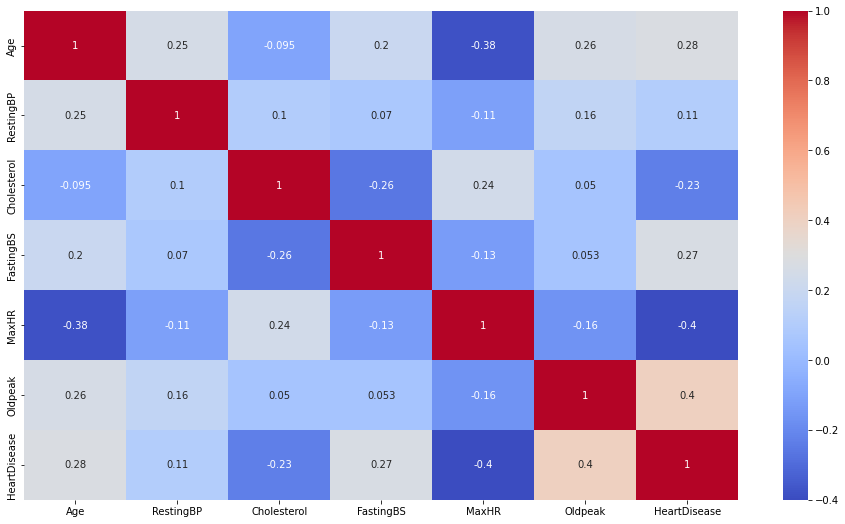

In [88]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

In [89]:
lin_reg.coef_

array([-8.17931478e-02,  8.17931478e-02,  1.64880474e-01, -1.09910457e-01,
       -7.80202893e-02,  2.30502726e-02,  7.35815540e-04, -1.29577802e-04,
       -6.06237737e-04, -7.17841365e-02,  7.17841365e-02, -1.06025406e-02,
        1.74593737e-01, -1.63991196e-01,  2.38908641e-03,  7.94138564e-04,
       -6.10054005e-04,  1.07363115e-01, -5.02402530e-04,  5.03339465e-02])

In [90]:
# intercept_
lin_reg.intercept_

0.3315465484176276

In [91]:
#
X_test[0,:]

array([  0. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,
         1. ,   0. ,   1. ,   0. ,   0. ,  58. , 114. , 318. ,   0. ,
       140. ,   4.4])

In [92]:
lin_reg.predict([X_test[180,:]])

array([0.5489497])

In [93]:
#lin_reg.predict(X_test)
y_test.head(900)

900    1
570    1
791    1
189    1
372    1
      ..
216    1
844    0
740    0
107    0
49     1
Name: HeartDisease, Length: 184, dtype: int64

In [96]:
lin_reg.score(X_test , y_test)

0.642294018721341

In [122]:
y.ndim

1

In [123]:
X.ndim

2

Implementing Lasso And Ridge

In [108]:
from sklearn.linear_model import Lasso , Ridge
rd = Ridge()

rd.fit(X_train , y_train)
rd.score(X_test , y_test)

0.6422939038653699

In [109]:
ls = Lasso(alpha=2)

ls.fit(X_train , y_train)
ls.score(X_test,y_test)

-0.012853813762573996

In [119]:
y_predict = lin_reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test , y_predict)
rmse= np.sqrt(mse)

print('MSE = ',mse)
print('RMSE  ',rmse)

MSE =  0.2487056055496486
RMSE   0.4987039257411642


In [128]:
y.ndim

1

In [125]:
plt.scatter(X , y , color='red')
plt.plot(X , lin_reg.predict(X_test) , color='blue')
plt.show()

AttributeError: 'Series' object has no attribute 'reshape'